# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'retina' #For clearer visualization 

### Reading the dataset

In [3]:
Data = pd.read_csv('yelp_test_df.txt', header=None, names=['Rating', 'Review'])
Data.head( )

,Rating,Review
0,label,text
1,0,cox great speak customer service person juan ...
2,3,las vegas work time look cheap strip room s...
3,4,visit morton s night dinner seat waiter gr...
4,1,look forward posh time idea chef create mea...


### Shape Of dataset

In [4]:
Data.shape

(10001, 2)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  10001 non-null  object
 1   Review  10001 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


The dataset existing with 2 columns and 100001 rows.

what we can see here is, the rating also object datatype.


### Basic Subsetting

The basic subsetting steps include with check verified review, like in previous data sets, drop columns and drop duplicates. As we can see, the data set only include with the 2 columns, therefore we do not need to do the verified text filtering or dropping columns and  drop any duplicates here.

So first we can check whether there is any null values left.

#### 1. Check for NaN values

In [6]:
Check_Nan=Data.isna().sum()
print (Check_Nan)

Rating    0
Review    0
dtype: int64


We can observe that , there no any NaN value.


### Distribution of ratings

Now will look at the rating distribution to check whether the data set is a biased dataframe or not.

<Axes: title={'center': 'Distributionof Overall sentiments'}, xlabel='Rating'>

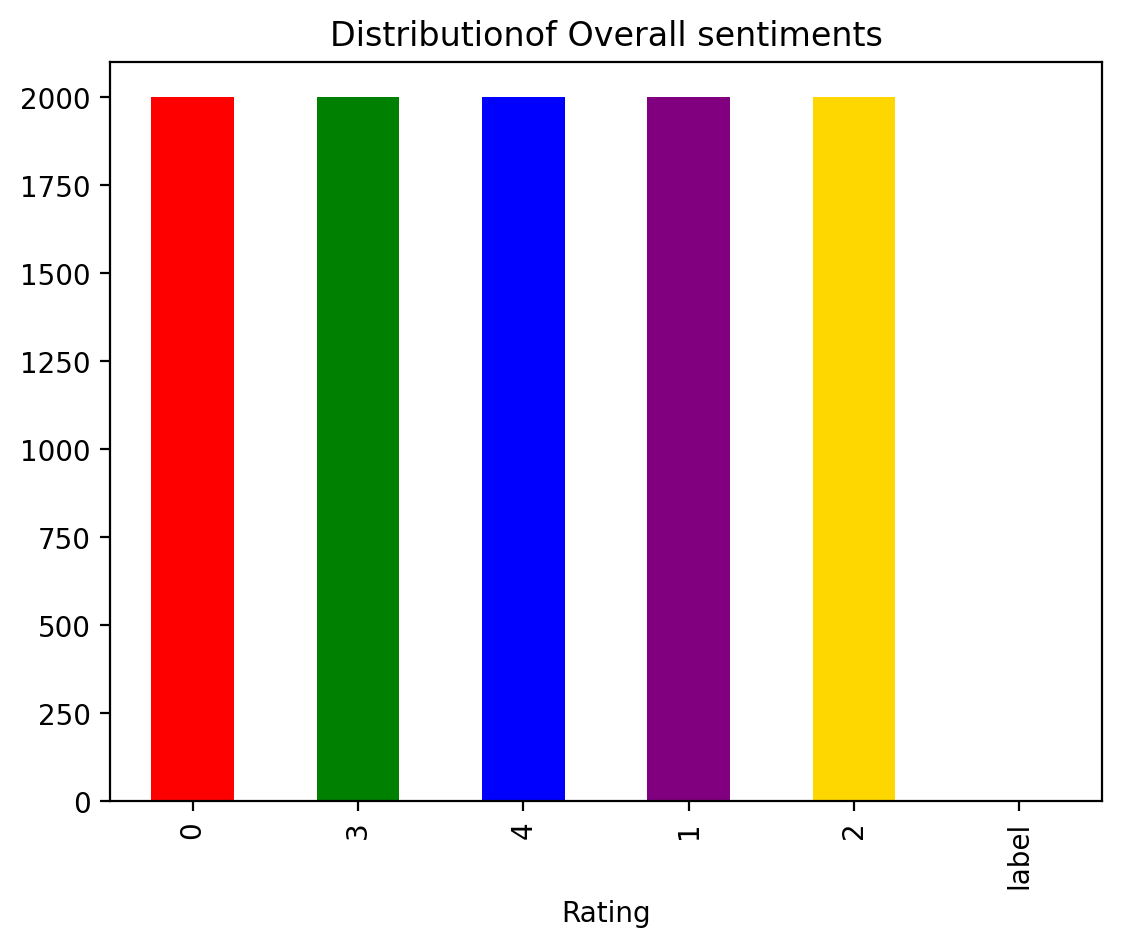

In [7]:
Data.Rating.value_counts().plot(kind='bar',title='Distributionof Overall sentiments',color=['red','green','blue','purple','gold'])

In [8]:
Data.Rating.value_counts(normalize=True)

Rating
0        0.19998
3        0.19998
4        0.19998
1        0.19998
2        0.19998
label    0.00010
Name: proportion, dtype: float64

As we can see that this is kind of prefect distribution to create a model which is unbaised with the given ratings.

## Text Exploration

The objectives of exploring the reviews is to understand the fundamental composition of datasets through both aggregate and individual investigation. Some of the core things we need to understand include:

1. Use of Punctuations & special characters
2. Use of emojis
3. Length of reviews

**Now we will proceed o see some of the reviews:**

In [9]:
Data.iloc[776,1]


'food disgust reason go buy restaurant s com voucher save like        dollar s decide try order salad    dozen wing    large pepperoni pizza    lettuce old tomato mushy    wing taste like ve sit    finally pizza flavor pizza stick    bad nasty food aside staff decide add      tip go'

In [10]:
Data.iloc[84,1]


'go cantina laredo evening work large group     good experience   n nthe food   super authentic mexican mean offer edited menu s execute   word   small menu pretty good    complimentary chip salsa replenish frequently    probably eat like bowl chip   free     m vegan order tacos de hongos   mushroom tacos    balsamic glaze tasty   cheese plate good portion size    n nthe service   busy thank co worker have reservation   score large table   section slide door obvious give space typically use private dining event   don t remember waitress good    accomodate request offer suggestion   recommend mango margarita awesome    n noverall   m look forward come happy hour munch chip mango margaritas'

#### 1. Use of Punctuations and Special Characters

In the Traditional sentiment analysis, Punctuations usually used to emphasize the extent of the review.However, In most cases,they were unnecessary. Some useful tools now turn them into words.This section explore the use of punctuations.

 Here we use the python library called  're' (regular expression) module to find and extract all punctuation marks from the 'Review' column of a DataFrame.

In [11]:
import re

# searching for all punctuation
Data['punctuation'] = Data['Review'].apply(lambda x:''.join(set(re.findall(r'[^\w\s]+',str(x)))) )

In [12]:
Data.head()

,Rating,Review,punctuation
0,label,text,
1,0,cox great speak customer service person juan ...,
2,3,las vegas work time look cheap strip room s...,
3,4,visit morton s night dinner seat waiter gr...,
4,1,look forward posh time idea chef create mea...,


In [13]:
Data=Data.drop(0)

#### Few notable items

1. The Use of & is shorthand for 'and'. Identifying the availability of &, we can replace with the word 'and'.
2. The use of $ denotes the expensiveness or the actual price.

**To make the text readable,**

In [14]:
pd.set_option('display.max_colwidth',None)# here, 'None' means , there is no maximum limit set for the column width.
Data[Data['punctuation'].str.contains(r'\$|\&') == True]

,Rating,Review,punctuation


In [15]:
Data['punctuation'].head()

1    
2    
3    
4    
5    
Name: punctuation, dtype: object

Here we can understand that, there is no punctuations included in this dataset.

#### Replacing numbers with words

A useful process is replacing numbers with words. As a example: 1 in to "one" , 2 in to "two , ... & so on. For that, we are using "inflect" library. The step will be involve with following:

1. Find all numbers using regular expression
2. Replace the numbers with words

In [16]:
import inflect

p= inflect.engine()


**function to replace a matched object with its word equivalent:**

In [17]:

def replace_with_words(match):
    number = match.group(0)
    return p.number_to_words(number)

def number_to_words(text):
    # Replace all numbers in the text with their word representation
    return re.sub(r'\b\d+\b', replace_with_words, text)

In [18]:
sample_text = """I give this item 1 star solely because the description for item, and the packaging shows 2 different amount....header states 2 ibs.......picture shows 3 ibs...i 
                  did not really pay attention to header description.....just read back & front label on product..... so i called amazon & the customer service  
                  lady said its suppose to be 3 ibs as shown in picture....well i recieved a 2 ib bag....so she took care of the situation like a professional 
                  ......she also stated she would report this era to the approperiate channels..i would refrain from purchasing this item until the era 
                  is corrected..... the picture shows what i recieved the other picture is what i should have recieved."""

number_to_words(sample_text)

'I give this item one star solely because the description for item, and the packaging shows two different amount....header states two ibs.......picture shows three ibs...i \n                  did not really pay attention to header description.....just read back & front label on product..... so i called amazon & the customer service  \n                  lady said its suppose to be three ibs as shown in picture....well i recieved a two ib bag....so she took care of the situation like a professional \n                  ......she also stated she would report this era to the approperiate channels..i would refrain from purchasing this item until the era \n                  is corrected..... the picture shows what i recieved the other picture is what i should have recieved.'

**Note:**

There are some issues with replace numbers. Some review use numbers to represent prioritization. i.e. - First, 2) second etc. Therefore for now, we will ignore this part.

In [19]:
pd.reset_option('^display.', silent=True)

# replaces numbers to words
Data['Review'] =  Data['Review'].apply(lambda x:  number_to_words(str(x)))

In [20]:
Data.head()

,Rating,Review,punctuation
1,0,cox great speak customer service person juan ...,
2,3,las vegas work time look cheap strip room s...,
3,4,visit morton s night dinner seat waiter gr...,
4,1,look forward posh time idea chef create mea...,
5,1,thing save joint star tater tot ballanty...,


Since there is no punctuations availablle, we can drop the column added previously.

In [21]:
Data.drop(columns=['punctuation'], inplace=True)

In [22]:
Data.head()

,Rating,Review
1,0,cox great speak customer service person juan ...
2,3,las vegas work time look cheap strip room s...
3,4,visit morton s night dinner seat waiter gr...
4,1,look forward posh time idea chef create mea...
5,1,thing save joint star tater tot ballanty...


### Word Cloud

This section performs a word Cloud to get a glimpse of the frequency of the words in the dataset.

In [23]:
all_text = ' '.join(Data.Review.tolist())
all_text[:500]

'cox great speak customer service person juan   employee          want package currently   n ni m pay         cancellation charge cox shove las vegas work    time look cheap strip room stay   normally stay swanky hotel   time go      night excalibur     choose   lot thing consideration make choice         bridge new york new york luxor      free tram mandalay bay      dick s resort restaurant   enjoy    n nwell   pretty happy selection        night upgrade new totally remodel tower ii    didn t  '

### Implementing the word cloud

In [24]:
from wordcloud import WordCloud, STOPWORDS

# specifying stop words
stop_words = set(STOPWORDS)

# Generating the word cloud
word_cloud = WordCloud(width=1600, height=800, stopwords=stop_words).generate(all_text)

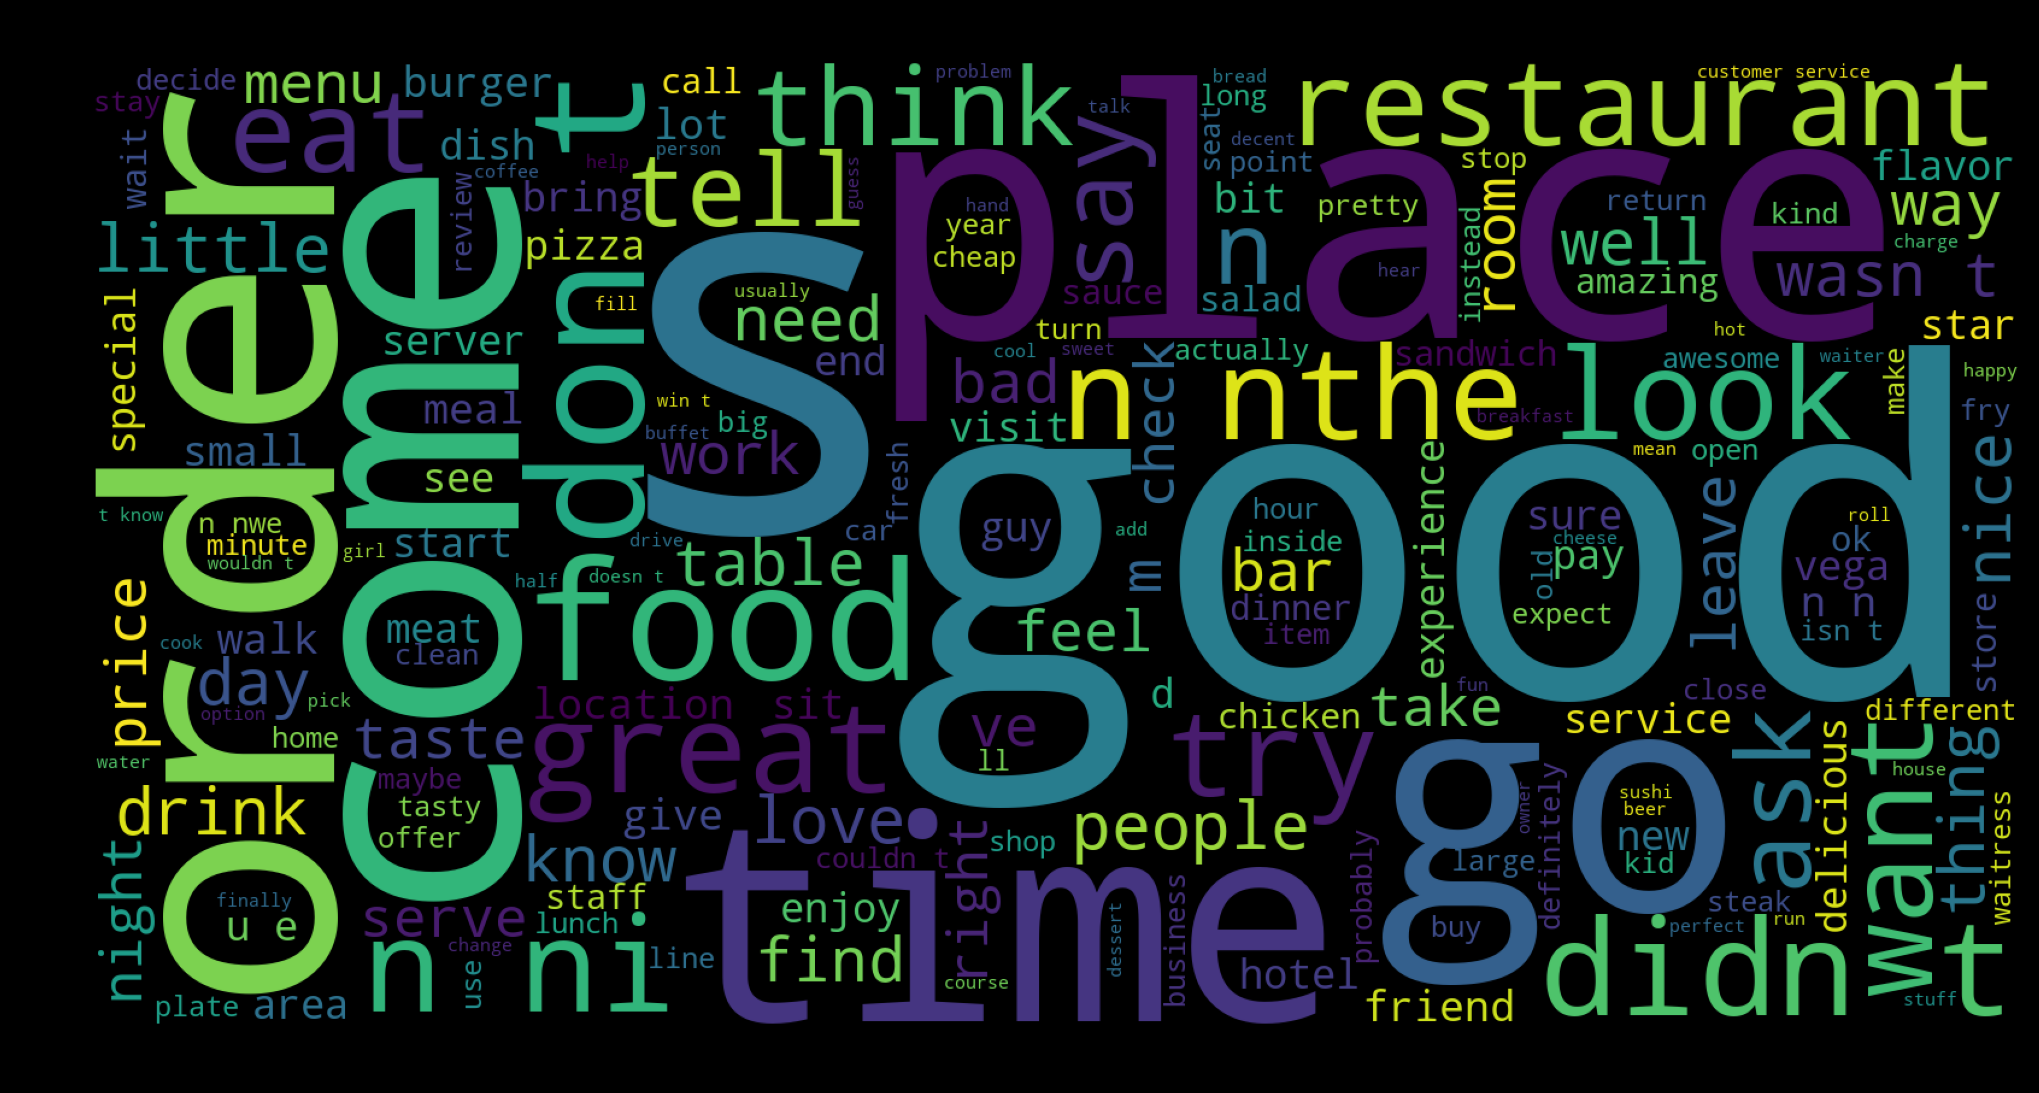

In [25]:
fig = plt.figure(1, figsize=(10,8), facecolor='k')
plt.title('Reviews summary')
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.show()

**View the 'S' include review**

In [26]:
# Filter the DataFrame for rows containing the word "S" in the reviewText column
reviews_with_S = Data[Data['Review'].str.contains('S')]

# Print the reviews containing the word "S"
for review in reviews_with_S['Review']:
    print(review)

As we can see , There is no any review exsist with 'S'  and we have to findout the reason later.

**Note:**

The word cloud above is generated from reviews with the minimal application of NLP processing. To get a better insight, we will need to implement Stemming/lemmatization on the data.

### Stemming & Lemmatizatiton

Stemming and lemmatization refers to the process of breaking down a word into it's root. For example, lovely becomes love. This helps us to significantly reduce the variation of a singular word. Below, I implement lemmatization. I will also use positional tags to further refine the lemmatization process.

In [27]:
import nltk
from nltk.corpus import wordnet
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()

In [28]:
pos_dict = { "N": wordnet.NOUN,  "V": wordnet.VERB, "J": wordnet.ADJ,  "R": wordnet.ADV}

In [29]:
# lemmatizing review
def lemmatize_review(text):
    new_sentence = []
    for token in nltk.pos_tag(nltk.word_tokenize(text)):
        # remove the stop words
        if token[0] not in stopwords.words('english'):
            pos = pos_dict.get(token[1][0].upper(), wordnet.NOUN)
            lemma = lemmatizer.lemmatize(token[0], pos=pos)
            new_sentence.append(lemma)
            
    return new_sentence

### lemmatized vs Raw text

The example below shows the difference in Lemmatized Text and Raw Text

In [30]:
Data.iloc[52, 1]

'try find place time town fail    glad try    get early   get great seat outside    awesome son sure know menu kids item    server   haley    great attentive    food solid beer selection    definitely'

In [31]:
print(lemmatize_review(Data.iloc[52, 1]))

['try', 'find', 'place', 'time', 'town', 'fail', 'glad', 'try', 'get', 'early', 'get', 'great', 'seat', 'outside', 'awesome', 'son', 'sure', 'know', 'menu', 'kid', 'item', 'server', 'haley', 'great', 'attentive', 'food', 'solid', 'beer', 'selection', 'definitely']


### Implementing Lemmatization to Review

In [32]:
Data['lemmatized_review'] = Data.Review.apply(lambda x: ' '.join( lemmatize_review(str(x))) )
Data.head()

,Rating,Review,lemmatized_review
1,0,cox great speak customer service person juan ...,cox great speak customer service person juan e...
2,3,las vegas work time look cheap strip room s...,la vegas work time look cheap strip room stay ...
3,4,visit morton s night dinner seat waiter gr...,visit morton night dinner seat waiter greet sh...
4,1,look forward posh time idea chef create mea...,look forward posh time idea chef create meal b...
5,1,thing save joint star tater tot ballanty...,thing save joint star tater tot ballantyne loc...


In [33]:
Data['lemmatized_review'] = Data['lemmatized_review'].apply(lambda x: str(x).lower())

### Implementing WordCloud on Lemmatized Review

Now that we have a lemmatized the text, we can visualize it on a wordcloud.

In [34]:
word_cloud = WordCloud(width=1000, height=800, stopwords=stop_words).generate(' '.join(Data.lemmatized_review.tolist()))

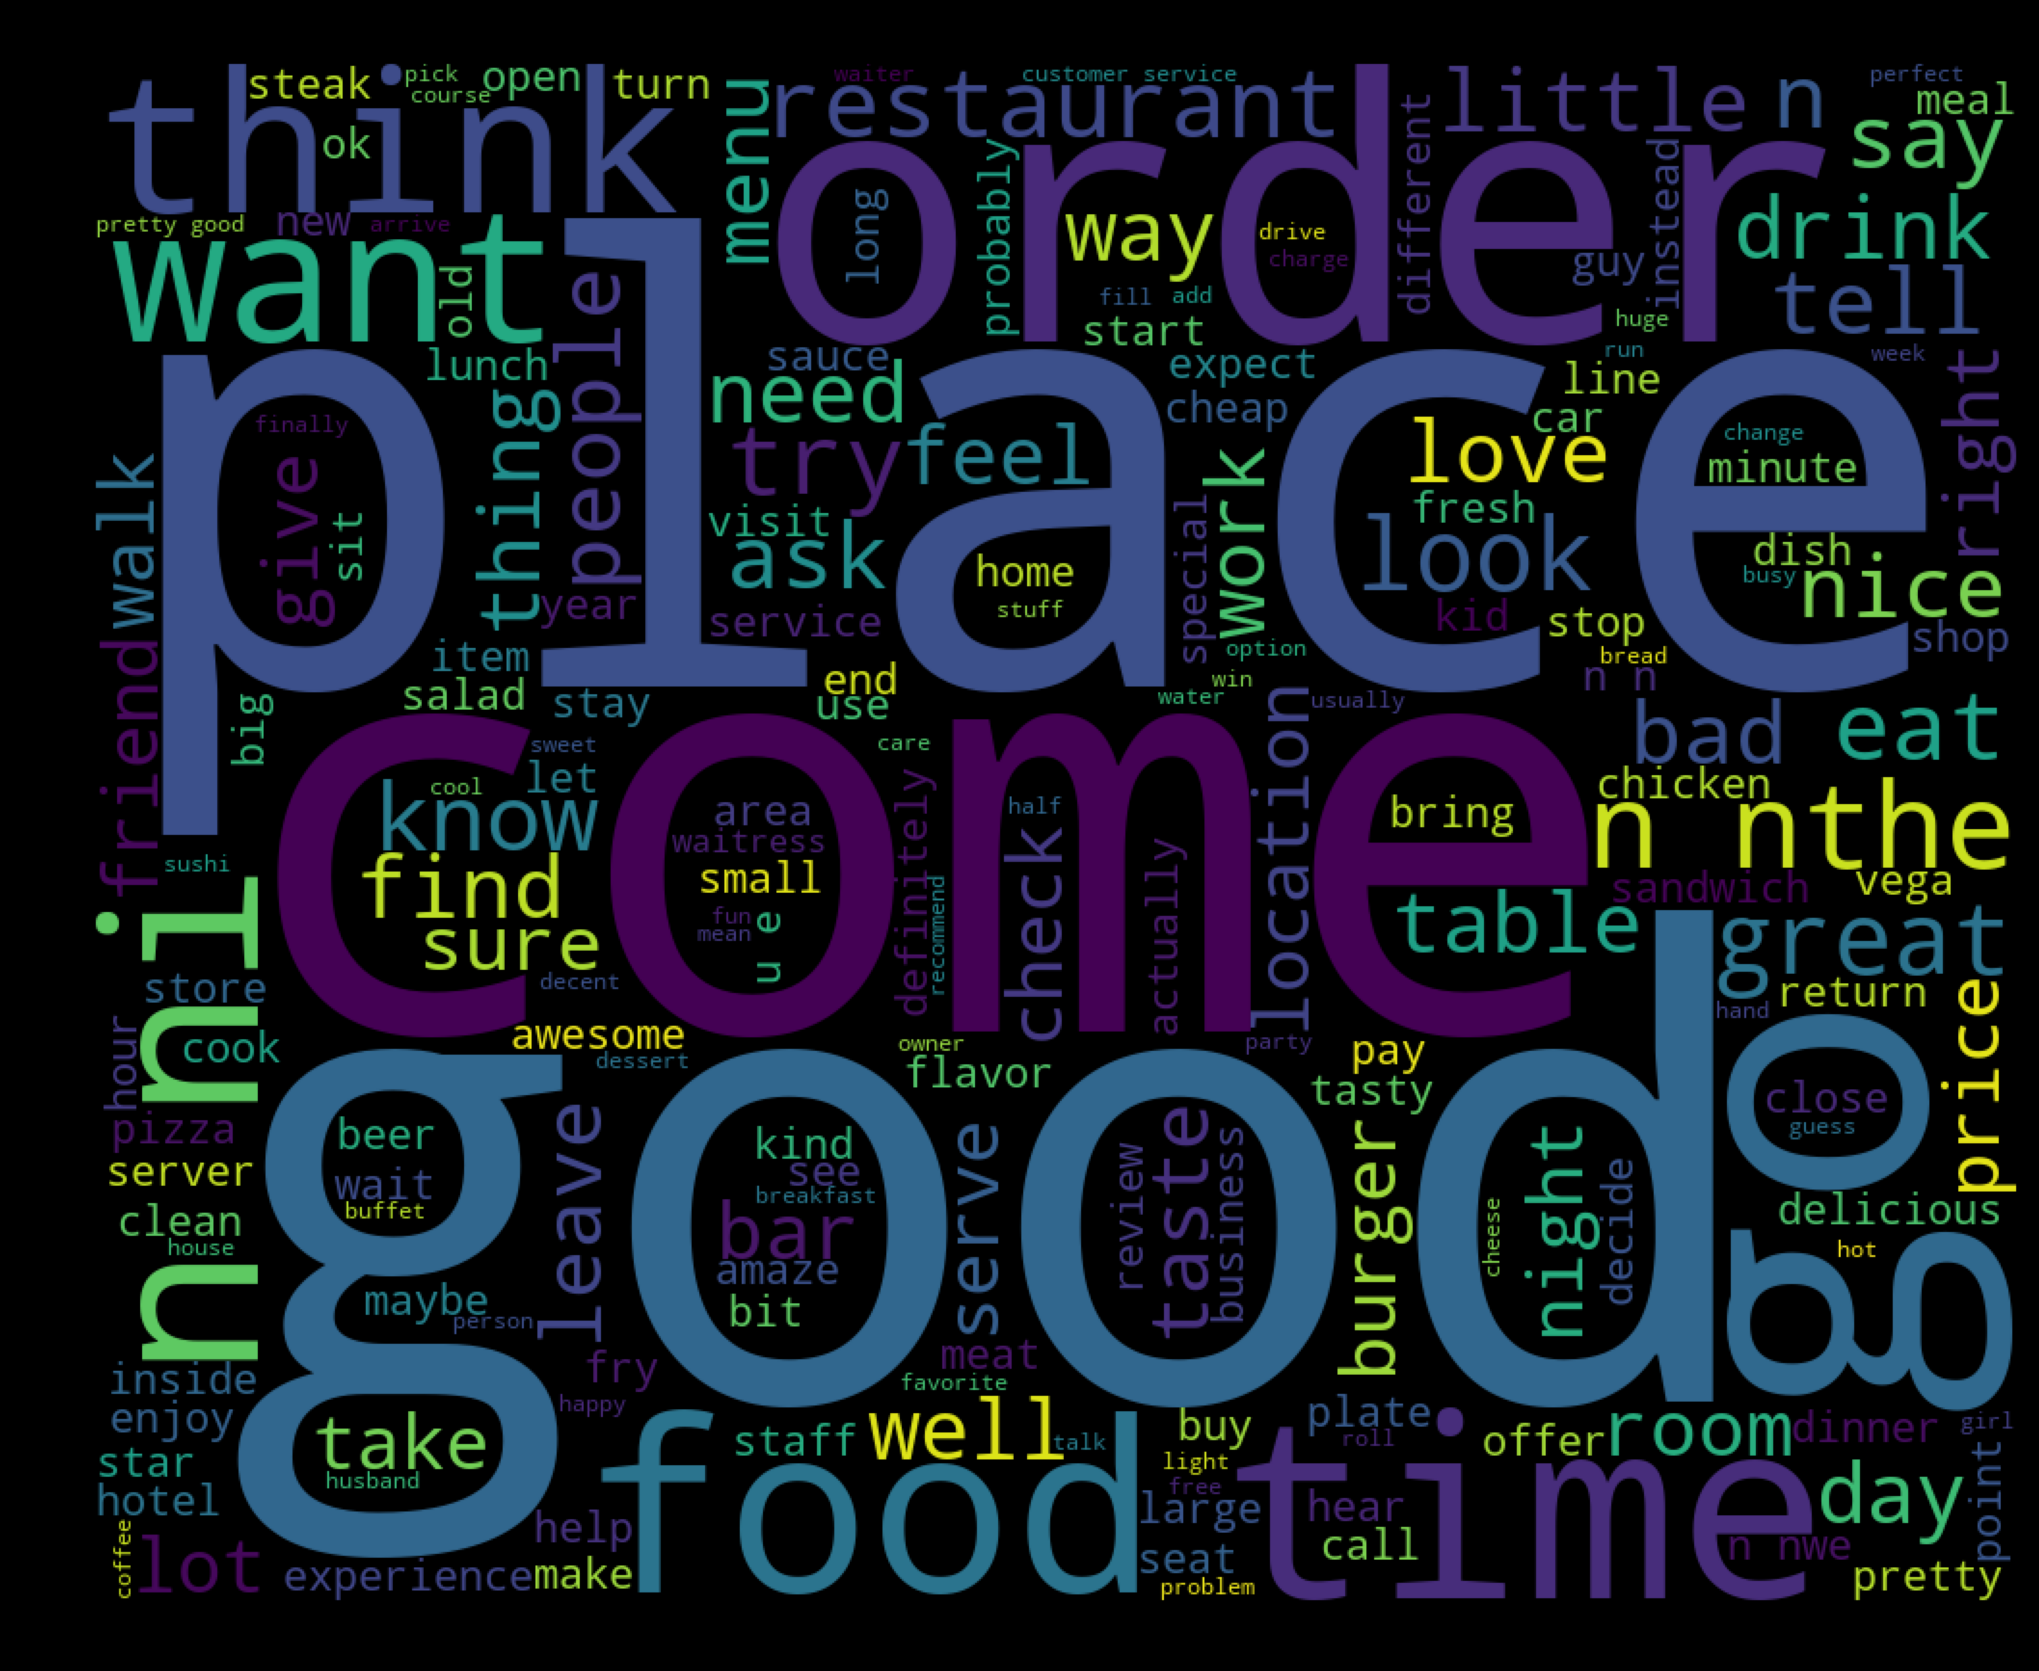

In [35]:
fig = plt.figure(1, figsize=(10, 10), facecolor='k')
plt.title('Review Summary ')
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.show()

Now as you can see, There were some meaning less words and letters popped up in previous wordCloud, But now we can see that there are only meaningful words left in the word cloud.

**This line of code selects specific columns from a DataFrame (lemmatized_review and Rating) and exports them to a CSV file named 'Data.csv' without including row indices:**

In [36]:
Data[['lemmatized_review', 'Rating']].to_csv('Data.csv', index=False)

### Corpus

A Corpus refers to a collection of text or speech data that is carefully selected and organized for linguistic analysis.In our specific case, the corpus consists of 10000 reviews.

In [37]:
corpus = Data.Review.tolist()
  
print("The size of our corpus is:", len(corpus), "\n")
print("The first Review in our corpus is:\n", corpus[0])

The size of our corpus is: 10000 

The first Review in our corpus is:
 cox great speak customer service person juan   employee          want package currently   n ni m pay         cancellation charge cox shove


In [38]:
sample_document = corpus[6]
sample_document

'm home holiday   look forward reacquaintance tin tin    typically weekday lunch   price tag        palatable roughly double dinner price      tin tin great rendition ubiquitous chinese buffet     n nas big fan sushi   chinese buffet respectable offering    sushi snob   go to overwhelm   ll usually lot bad      count good selection boring staple california philadelphia roll      different nigiri presentation include eel   snapper salmon   half dozen roll form fish   bonus offering spicy salmon sashimi eel hand roll   usually   offering vary day day      n nmy favorite hot item probably thick rice noodle   pad kee mao type    satisfy thai craving   yummy nonetheless    big complaint item tin tin rotate   usually singaporean noodle find incredibly    meh      fact dessert leave lot desire reason take star   n notherwise   enjoy butter shrimp salty fry exterior   thai chicken yummy mix sweet spiciness   pork dumpling   cream cheese puff    sesame chicken kick tooth cloying sweetness   gen

### Tokenization

A token is a meaningful entity that makes up a document, similar to how words make up sentences. The choice of tokens can vary depending on the task and corpus being analyzed; they can encompass sentences, phrases, words, or even individual characters. In many NLP applications, words serve as the fundamental tokens.

### Word Tokenization

In [39]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize

print("Word Tokenizer: ", word_tokenize(corpus[0])[:10])
print("Word Punct Tokenizer: ", wordpunct_tokenize(corpus[0])[:10])

Word Tokenizer:  ['cox', 'great', 'speak', 'customer', 'service', 'person', 'juan', 'employee', 'want', 'package']
Word Punct Tokenizer:  ['cox', 'great', 'speak', 'customer', 'service', 'person', 'juan', 'employee', 'want', 'package']


We can observe that the result is a list of individual words extracted from the document. The output above displays the first 10 words generated by both word tokenizers. It is worth noting that the word_tokenize function does not separate the word 'non-stop' into distinct tokens, whereas the wordpunct_tokenize function does split it into separate tokens.

### Stop Words

Stopwords are words that are part of the grammatical structure of the language but do not carry much semantic meaning to the text. These are often frequent words like 'is' and 'the' that whether they are in or out of the text, the meaning does not change. In NLP, we often deal with stopwords by removing them or selecting what to retain.

In [40]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sentence = "the restaurant at the city served amazing food"
print("With Stop words:", sentence, "\n" )

without_stopwords = [word for word in word_tokenize(sentence) if word not in stopwords.words('english')]
print('Without Stop words:', ' '.join(without_stopwords))

With Stop words: the restaurant at the city served amazing food 

Without Stop words: restaurant city served amazing food


### Combining Preprocessing Steps

We have discussed concepts and techniques to preprocess data for feature extraction. The next step is to put them together into a preprocessing function that can be run against the dataset. Below is an example of one such function.

In [41]:
from nltk.stem import PorterStemmer

In [43]:
porter_stemmer = PorterStemmer()

def cleaningText(text):
    """
    Text Cleaning:
        - Remove Punctuation
        - Remove Numbers
        - Tokenize Text
        - Stem Text
        - Remove Stopwords
    """ 
    text = re.sub("[^a-zA-Z]", " ", text) # Remove Punctuation
    text = re.sub("[0-9]+", "", text) # Remove Numbers
    text = [ porter_stemmer.stem(word.lower()) for word in word_tokenize(text) if word not in stopwords.words('english') ]
    return " ".join(text)

In [44]:
cleaningText("The restaurantant has really amazing service and great food")

'the restaurant realli amaz servic great food'

In [45]:
# running the preprocesing_step
Data['clean_review'] = Data.Review.apply( lambda x: cleaningText( str(x)) )
Data[['Review', 'clean_review']].head()

,Review,clean_review
1,cox great speak customer service person juan ...,cox great speak custom servic person juan empl...
2,las vegas work time look cheap strip room s...,la vega work time look cheap strip room stay n...
3,visit morton s night dinner seat waiter gr...,visit morton night dinner seat waiter greet sh...
4,look forward posh time idea chef create mea...,look forward posh time idea chef creat meal ba...
5,thing save joint star tater tot ballanty...,thing save joint star tater tot ballantyn loca...


### N-grams

N-grams is a process of tokenizing a body of text sequentially to the nth value. When we used word_tokenize, we were effectively performing 1-gram tokenization. Alternatively, we can choose an n-gram that may combine tokens that are more meaningful together.

In [46]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

document = "New York is truly an amazing city to live in"

[ ' '.join(gram) for gram in ngrams(word_tokenize(document), 2) ]

['New York',
 'York is',
 'is truly',
 'truly an',
 'an amazing',
 'amazing city',
 'city to',
 'to live',
 'live in']

N-grams have the advantage of capturing sentiments like "not bad" or "very good" into a singular token which can be an effective feature for analysis and modeling as compared to individual tokenization.

### Bag of Words

The bag of words is a process that generates features by collecting all the tokens in the corpus and placing them in a bag, thereby creating the vocabulary for the corpus. From this vocabulary, one-hot encoding can be applied to determine the presence or absence of each vocabulary in a document, thus creating features.

Now, let's illustrate this process with a simple corpus consisting of 5 short documents below:

In [47]:
corpus = [ "the restaurant had great food",
           "i love python programming",
           "i prefer R to python",
           "computers are fun to use",
           "i did not like the movie"] 

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

bows_counter = CountVectorizer( analyzer='word',            # Word level vectorizer
                                lowercase=True,             # Lower case the text
                                ngram_range=(1, 1),         # Create 1 n-grams
                                tokenizer= word_tokenize,   # Use this tokenizer
                                stop_words = 'english')     # remove english stopwords

bows_counter.fit(corpus)
features = bows_counter.transform(corpus).toarray()

C:\Users\Narmada\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


The code above implements a count vectorizer that tokenizes words at 1-gram, removes stop words, and creates a one-hot encoding feature set. We can look at the results of our feature conversion by transforming the features into a data frame.

In [49]:
features_df = pd.DataFrame(features, columns=bows_counter.get_feature_names_out())
features_df

,computers,did,food,fun,great,like,love,movie,prefer,programming,python,r,restaurant,use
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,1,0,0,0,0,0,0


Term Frequency Inverse Document Frequency a.k.a TF-IDF "TF-IDF is a commonly used weighting technique that assigns weights reflecting the importance of a word to a document. The basis of this technique is the idea that if a word appears frequently across all documents, it is less likely to hold significant information about any specific document. On the other hand, words that appear frequently in one or a few documents and rarely across all documents are considered to have specific importance and should be assigned higher weights.

The mathematical expression of tf-idf (in one of the many forms) is:


$$\text{tf-idf} = \text{frequency}_{t,d} \times \log\left(\frac{\text{total documents}}{\text{total documents containing the term}}\right)$$

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer( analyzer='word',          # Word level vectorizer
                                    lowercase=True,           # Lowercase the text
                                    tokenizer= word_tokenize) # Use this tokenizer)

tfidf_vectorizer.fit(corpus)
tfidf_features = tfidf_vectorizer.transform(corpus).toarray()

C:\Users\Narmada\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [54]:
tfidf_df = pd.DataFrame(tfidf_features, columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,are,computers,did,food,fun,great,had,i,like,love,movie,not,prefer,programming,python,r,restaurant,the,to,use
0,0.000000,0.000000,0.000000,0.463693,0.000000,0.463693,0.463693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.463693,0.374105,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380406,0.000000,0.568014,0.000000,0.000000,0.000000,0.568014,0.458270,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.345822,0.000000,0.000000,0.000000,0.000000,0.516374,0.000000,0.416607,0.516374,0.000000,0.000000,0.416607,0.000000
3,0.463693,0.463693,0.000000,0.000000,0.463693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.374105,0.463693
4,0.000000,0.000000,0.442832,0.000000,0.000000,0.000000,0.000000,0.296570,0.442832,0.000000,0.442832,0.442832,0.000000,0.000000,0.000000,0.000000,0.000000,0.357274,0.000000,0.000000


### CountVectorizer and TfidfVectorizer

We can use a vectorizer for text outside of the training data. It will create a vector corresponding to the column names and adds a tfidf value if the word is present in the column and zero otherwise.

In [55]:
bows_counter.transform(['python programming is great']).toarray()

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0]], dtype=int64)

In [56]:
tfidf_vectorizer.transform(['python programming is great']).toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.61418897, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.61418897, 0.49552379,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

### Features to Matrix

The final step is to apply the tfidf vectorize to the dataset to obtain the feature and convert features into a matrix that can be ingested into a model for training. The example below demonstrates this implementation using the Amazon product reviews dataset.

In [57]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

review_tfidf_vectorizer = TfidfVectorizer( #max_feautures = 1000,        # Return the top 1000 features
                                        analyzer='word',              # Word level vectorizer
                                        lowercase=True,               # Lower case the text
                                        min_df = 5,                   # Use tokens that appear at least 5 times
                                        ngram_range=(1, 2),           # Create 1 n-grams
                                        tokenizer= word_tokenize,     # Use this tokenizer
                                        stop_words = 'english',       # remove english stopwords 
                                        sublinear_tf=1, smooth_idf=1, use_idf=1) # Additional Features

review_tfidf_vectorizer.fit(Data.clean_review)
features_df = pd.DataFrame( review_tfidf_vectorizer.transform(Data.clean_review).toarray(), 
                            columns=review_tfidf_vectorizer.get_feature_names_out())
features_df.head()

C:\Users\Narmada\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\Narmada\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,aaa,abandon,aber,abil,abl,abl eat,abl enjoy,abl finish,abl order,abl seat,...,zip,zipp,zombi,zone,zoo,zu,zucchini,zum,zuman,zuzu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now that we have the features set, we can move on to developing a model to predict the sentiment.

### Train and Test Split

The code below implement a 70-30 percent Train to Test Split

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split

# Check the lengths of features and Amazon_D2.overall
print("Number of samples in features:", len(features))
print("Number of samples in Data.Rating:", len(Data.Rating))

# Perform train-test split if lengths are consistent
if len(features) == len(Data.Rating):
    x_train, x_test, y_train, y_test = train_test_split(features, Data.Rating, test_size=0.30, stratify=Data.Rating, random_state=42)
    print("Train set size:", len(x_train))
    print("Test set size:", len(x_test))
    y_train.value_counts(), y_test.value_counts()
else:
    print("Number of samples in features and Data.Rating are inconsistent.")

Number of samples in features: 5
Number of samples in Data.Rating: 10000
Number of samples in features and Data.Rating are inconsistent.


In [59]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( features_df, Data.Rating, test_size=.30, stratify=Data.Rating, random_state=42)
y_train.value_counts(), y_test.value_counts()

(Rating
 0    1400
 4    1400
 1    1400
 2    1400
 3    1400
 Name: count, dtype: int64,
 Rating
 0    600
 1    600
 2    600
 4    600
 3    600
 Name: count, dtype: int64)

# Naive Bayes Model

In [60]:
from sklearn.naive_bayes import MultinomialNB
    
naive_bayes_model = MultinomialNB(alpha=.3, fit_prior=True)

naive_bayes_model.fit(x_train, y_train)

MultinomialNB(alpha=0.3)

In [61]:
from sklearn.metrics import accuracy_score

print("Training Accuracy:", round( accuracy_score(naive_bayes_model.predict(x_train), y_train ), 2) )
print("Test Accuracy:", round( accuracy_score(naive_bayes_model.predict(x_test), y_test ), 2))

Training Accuracy: 0.91
Test Accuracy: 0.48
